In [1]:
# Cell 1 - Setup
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

max_features = 10000   # top words
max_len = 200          # cut after 200 words


In [2]:
# Cell 2 - Load & preprocess data
print("📥 Loading IMDB dataset...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print(f"Training samples: {len(x_train)}, Test samples: {len(x_test)}")


📥 Loading IMDB dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 25000, Test samples: 25000


In [3]:
# Cell 3 - Build model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(SimpleRNN(128, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


c:\Users\Nishant\OneDrive\Desktop\nait mi\imdb review\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Cell 4 - Train model
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.5874 - loss: 0.6602 - val_accuracy: 0.6012 - val_loss: 0.6724
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7237 - loss: 0.5314 - val_accuracy: 0.6862 - val_loss: 0.5944
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8278 - loss: 0.3911 - val_accuracy: 0.7722 - val_loss: 0.5844
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8126 - loss: 0.4186 - val_accuracy: 0.7190 - val_loss: 0.5698
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8594 - loss: 0.3336 - val_accuracy: 0.7894 - val_loss: 0.5150


In [5]:
# Cell 5 - Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"🎯 Test Accuracy: {acc:.4f}, Loss: {loss:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7937 - loss: 0.4939
🎯 Test Accuracy: 0.7937, Loss: 0.4939


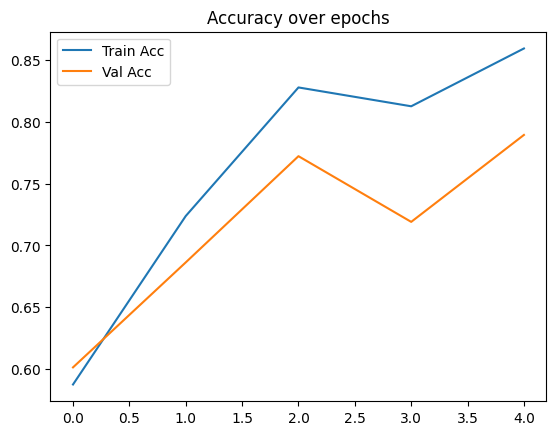

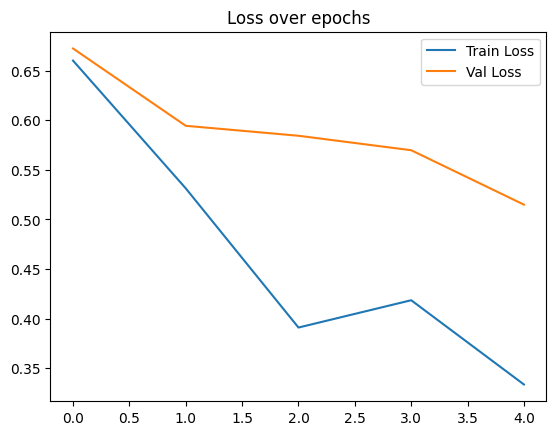

In [6]:
# Cell 6 - Plot accuracy & loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over epochs")
plt.legend()
plt.show()


In [7]:
# Cell 7 - Save model
model.save("models/imdb_rnn.h5")
print("✅ Model saved at models/imdb_rnn.h5")


✅ Model saved at models/imdb_rnn.h5
